In [2]:
# We are importing data from text file and seperating it on the basis of the TABS
import pandas as pd
data = pd.read_csv("wildfires.txt", sep="\t")
print(data)

       fire  year  temp  humidity  rainfall  drought_code  buildup_index  day  \
0     no     2015    28        59       0.0          8.06           3.47    1   
1     no     2010    30        61       1.3          8.17           4.03    2   
2     no     2009    26        83      13.1          8.08           3.59    3   
3     no     2017    25        87       2.5          7.18           2.42    4   
4     no     2014    28        77       0.0         14.98           4.63    5   
..      ...   ...   ...       ...       ...           ...            ...  ...   
199  yes     2017    31        67       0.0         45.15          17.89   26   
200   no     2017    29        89       4.4          8.74           6.52   27   
201   no     2009    27        88       0.5          8.87           3.71   28   
202   no     2016    25        56       0.1         15.54           6.10   29   
203  no      2012    24        62       0.2         16.72           5.75   30   

     month  wind_speed  
0 

In [3]:
# Exploring data for data types and checking for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fire           204 non-null    object 
 1   year           204 non-null    int64  
 2   temp           204 non-null    int64  
 3   humidity       204 non-null    int64  
 4   rainfall       204 non-null    float64
 5   drought_code   204 non-null    float64
 6   buildup_index  204 non-null    float64
 7   day            204 non-null    int64  
 8   month          204 non-null    int64  
 9   wind_speed     204 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 16.1+ KB


In [4]:
type(data)

pandas.core.frame.DataFrame

/var/folders/_7/g0742nl90ksgmxsjw9jc5wvw0000gn/T/ipykernel_38154/3873225495.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr());


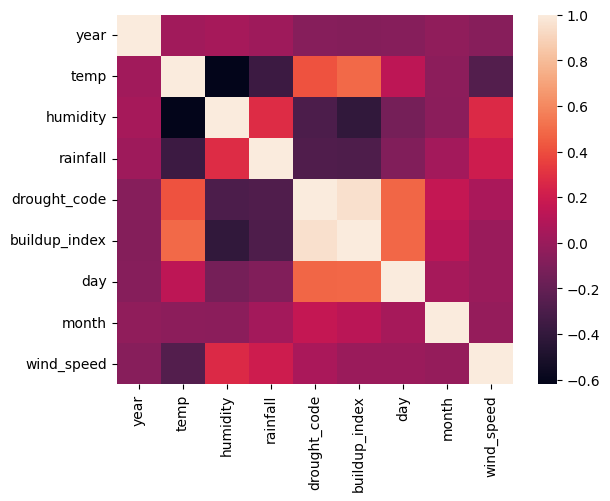

In [5]:
# Checking correlation between different Independent Features.
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.corr());
plt.show()

In [6]:
# Dropping features that might not have great impact on our dependent variables and negatively affect our Algoithm due to Over-fitting
del data["year"]
del data["day"]
del data["month"]

In [7]:
data

,fire,temp,humidity,rainfall,drought_code,buildup_index,wind_speed
0,no,28,59,0.0,8.06,3.47,19
1,no,30,61,1.3,8.17,4.03,13
2,no,26,83,13.1,8.08,3.59,22
3,no,25,87,2.5,7.18,2.42,15
4,no,28,77,0.0,14.98,4.63,18
...,...,...,...,...,...,...,...
199,yes,31,67,0.0,45.15,17.89,15
200,no,29,89,4.4,8.74,6.52,15
201,no,27,88,0.5,8.87,3.71,30
202,no,25,56,0.1,15.54,6.10,20


In [8]:
# Seperating dependent and independent variables.
dependent = data.values[:,0]
independent = data.values[:,1:9]

In [9]:
# We are witnessing a lot of extra white-spaces in out dependent variables of type object. This may make our model unnecessarily sensetive. We try to remove unnecessary whitespaces to form a uniform data. 
for var in range(len(dependent)):
    dependent[var] = dependent[var].replace(" ", "")
print(dependent)

['no' 'no' 'no' 'no' 'no' 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'no' 'yes' 'no' 'no' 'no' 'no' 'yes' 'yes' 'no' 'yes' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'yes' 'yes' 'no' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'no'
 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes'
 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'yes'
 'yes' 'yes' 'yes' 'no' 'no' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'no' 'yes'
 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'no' 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'no' 'no'

In [10]:
# To calculate the dimension of error in our model, we try to encode dependent variables to numbers. Here we are mapping "no" to 0 and "yes" to 1
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dependent = le.fit_transform(dependent)
dependent

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0])

In [11]:
len(dependent)

204

In [12]:
# We randomly split the data to 70% of test data and 30% of train data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    independent, dependent, test_size=0.3, random_state=0)

In [13]:
# Defining Perceptron 

In [14]:
## Defining required variables.
# Learning rate is the rate or dimention using which we adjust our weights in case of error. We start from 0.1 using brute-fore method and onclude 0.0001 to be the optimal learning rate
# Bias is a numerical term added to to the input to increase model accuracy. In linear model y=mx+b bias is the constant "b". We set bias as 1 and will be adjusting bias through weights as anyting multiplied by 1 is eqal to that number.
# We calculate number of features for helping in future calculations.
learningRate = 0.0001
bias = 1
feature_length = len(independent[0])

In [15]:
# Initializing random weights
# A 1-Dimention List consisting of different weights with a shape of (feature_length + 1) X 1. We are adding 1 more row for the bias. Structure: [Weigtht betwwen 1st input and Final Output, Weigtht betwwen 2nd input and Final Output,..., Weigtht betwwen nth input and Final Output]
import random
weights = []
for i in range(feature_length+1):
    weights.append(random.random())
weights

[0.28957349520296205,
 0.45441715077676714,
 0.15378411967574512,
 0.6840868833281446,
 0.6254292814614404,
 0.12811124285068431,
 0.5474961404228984]

In [16]:
# Activation Function
# Step Function
# This function takes the input and calculate the sum of dot product of inputs and weight and returns a value based on step function.
def activate(inputs):
    sum = 0
    for i in range(len(inputs)):
        sum += inputs[i] * weights[i]
    if (sum > 0):
        return 1
    else:
        return 0

In [17]:
# Data Training Function
# Adds bias to input.
# Calls activation function
# Implementing Back Propagation
import numpy as np

def train(inputs, desired):
    inputs = np.array(inputs)
    inputs = np.append(inputs,bias)
    guess = activate(inputs)
    error = desired-guess
    if(error != 0):
        for i in range(len(inputs)):
            weights[i] += learningRate * error * inputs[i]

In [18]:
# Test
# Adds bias to input.
# Returns the value of activation function 
def test(test_inputs):
    inputs = np.array(test_inputs)
    inputs = np.append(inputs,bias)
    return activate(inputs)


In [19]:
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt


In [20]:
# K-fold Train-Validation.
# This block iterates throught the train set 5 times and divide the train dataset into 5 blocks, with each iteration containing 1 block as a validation set and remainder of stack as a training set, and it trains the training stack and validates it against validation set. In each iteration we change the validation set to next block and readjusts the tarin set with all of the remainder dataset.
accuracies = []
target_names= ["no", "yes"]
test_len= len(X_test)
for i in range(5):
    print(i+1)
    print("i*round(test_len/5)", i*round(test_len/5), "(i*round(test_len/5))+ round(test_len/5)", (i*round(test_len/5))+ round(test_len/5))
    result=[]
    X_val = X_train[i*round(test_len/5):(i*round(test_len/5))+ round(test_len/5),:]
    
    X_train_stack = X_train
    X_train_stack = np.delete(X_train_stack,list(range(i*round(test_len/5),(i*round(test_len/5))+ round(test_len/5))), axis=0)

    
    y_val = y_train[i*round(test_len/5):(i*round(test_len/5))+ round(test_len/5)]
    
    y_train_stack = y_train
    y_train_stack= np.delete(y_train_stack,list(range(i*round(test_len/5),(i*round(test_len/5)+ round(test_len/5)))))
    

    print("X_train_stack", len(X_train_stack))
    for key in range(len(X_train_stack)):
        train(X_train_stack[key], y_train_stack[key])
    for key in range(len(X_val)):
        result.append(test(X_val[key]))
    print(result)
    accuracy = accuracy_score(y_val, result)
    accuracies.append(accuracy)
    classification_report = metrics.classification_report(y_val, result, target_names=target_names)
    print("Accuracy: ", accuracy)
    print("Classification Report: ")
    print(classification_report)
    print("-------------------")

1
i*round(test_len/5) 0 (i*round(test_len/5))+ round(test_len/5) 12
X_train_stack 130
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Accuracy:  0.5833333333333334
Classification Report: 
              precision    recall  f1-score   support

          no       0.00      0.00      0.00         5
         yes       0.58      1.00      0.74         7

    accuracy                           0.58        12
   macro avg       0.29      0.50      0.37        12
weighted avg       0.34      0.58      0.43        12

-------------------
2
i*round(test_len/5) 12 (i*round(test_len/5))+ round(test_len/5) 24
X_train_stack 130
[1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1]
Accuracy:  1.0
Classification Report: 
              precision    recall  f1-score   support

          no       1.00      1.00      1.00         4
         yes       1.00      1.00      1.00         8

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.

/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
# Once the model has been tested and validated against train dataset, we test the model on a test dataset (created using test-train split as a part of preprocessing) which model has never seen before.
results = []
for key in range(len(X_test)):
    results.append(test(X_test[key]))


In [22]:
results

[0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1]

In [23]:
accuracy = accuracy_score(y_test, results)
accuracy

0.8387096774193549

In [24]:
print(metrics.classification_report(y_test, results, target_names=target_names))

              precision    recall  f1-score   support

          no       0.77      0.89      0.83        27
         yes       0.90      0.80      0.85        35

    accuracy                           0.84        62
   macro avg       0.84      0.84      0.84        62
weighted avg       0.85      0.84      0.84        62



In [25]:
# Once we have the predicted output and actual results, we merge them to form 1 data frame and use the dataframe.to_csv function to output the result.
res_df = pd.DataFrame(list(zip(y_test,results )),columns=['Actual', "Predicted"])
res_df.to_csv("perceptron-single.csv")

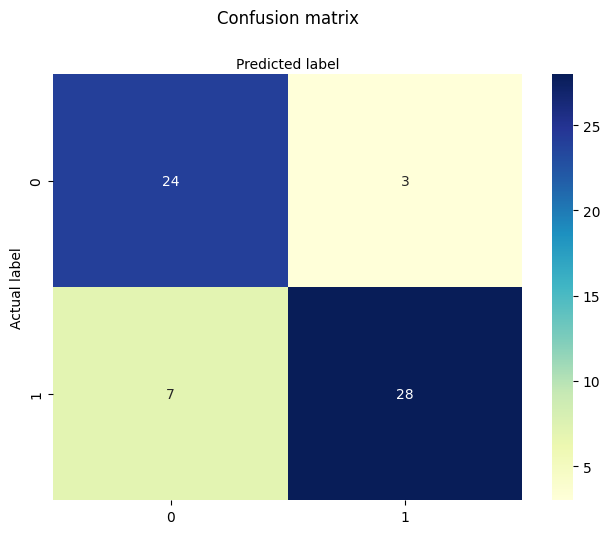

In [26]:
# Plot: Confusion matrix of the predicted label from the trained model.
cnf_matrix = metrics.confusion_matrix(y_test, results)
fig, ax = plt.subplots()
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names)
plt.yticks(tick_marks, target_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

AUC: 0.844


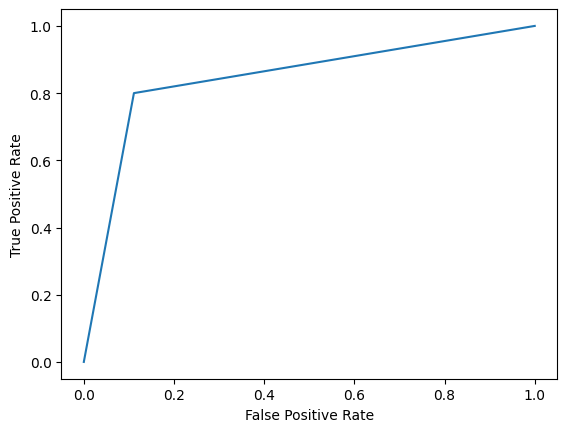

In [27]:
# Plot: ROC Curve of the predicted label from the trained model.
fpr, tpr, _ = metrics.roc_curve(y_test,  results)
# calculate AUC
auc = metrics.roc_auc_score(y_test, results)
print('AUC: %.3f' % auc)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

/opt/homebrew/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


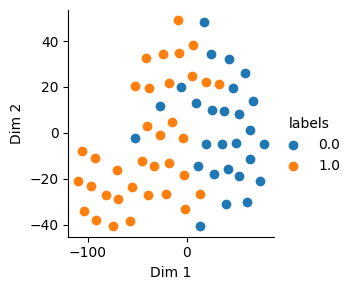

In [28]:
# To plot a scatter of data with 6 features in a 2-d plot is difficult. To overcome that we use TSNE to process our dataset int 2 variables.
# Plot: Scatter Plot of actual data distribution
model = TSNE(n_components = 2, random_state=2)
tsne_data_test = model.fit_transform(X_test)
tsne_data_test = np.vstack((tsne_data_test.T, y_test)).T

tsne_df_test = pd.DataFrame(data=tsne_data_test, columns=("Dim 1", "Dim 2", "labels"))

sns.FacetGrid(tsne_df_test, hue="labels").map(plt.scatter, "Dim 1", "Dim 2").add_legend()
plt.show()

/opt/homebrew/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


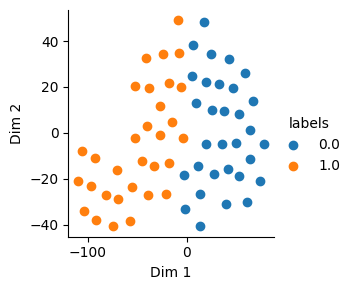

In [29]:
# Plot: Scatter Plot of predicted data distribution
tsne_data_result = model.fit_transform(X_test)
tsne_data_result = np.vstack((tsne_data_result.T, results)).T

tsne_df_result = pd.DataFrame(data=tsne_data_result, columns=("Dim 1", "Dim 2", "labels"))

sns.FacetGrid(tsne_df_result, hue="labels").map(plt.scatter, "Dim 1", "Dim 2").add_legend()
plt.show()

In [30]:
### Comparison with existing model

In [31]:
## Single iteration - No Validation
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.001, random_state=1)
ppn.fit(X_train, y_train)
 
y_pred = ppn.predict(X_test)


print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Accuracy: %.3f' % ppn.score(X_test, y_test))

Accuracy: 0.742
Accuracy: 0.742


In [32]:
print(metrics.classification_report(y_test, y_pred, target_names=target_names, zero_division=1))

              precision    recall  f1-score   support

          no       0.63      0.96      0.76        27
         yes       0.95      0.57      0.71        35

    accuracy                           0.74        62
   macro avg       0.79      0.77      0.74        62
weighted avg       0.81      0.74      0.74        62



In [33]:
## 5 iteration - 5 Validation
preceptron_multi = Perceptron(eta0=0.001, random_state=1)

for i in range(5):
    print(i+1)
    print("i*round(test_len/5)", i*round(test_len/5), "(i*round(test_len/5))+ round(test_len/5)", (i*round(test_len/5))+ round(test_len/5))
    X_val = X_train[i*round(test_len/5):(i*round(test_len/5))+ round(test_len/5),:]
    
    X_train_stack = X_train
    X_train_stack = np.delete(X_train_stack,list(range(i*round(test_len/5),(i*round(test_len/5))+ round(test_len/5))), axis=0)

    
    y_val = y_train[i*round(test_len/5):(i*round(test_len/5))+ round(test_len/5)]
    
    y_train_stack = y_train
    y_train_stack= np.delete(y_train_stack,list(range(i*round(test_len/5),(i*round(test_len/5)+ round(test_len/5)))))
    

    print("X_train_stack", len(X_train_stack))
    preceptron_multi.fit(X_train_stack, y_train_stack)
    result = preceptron_multi.predict(X_val)
    print(result)
    accuracy = accuracy_score(y_val, result)
    accuracies.append(accuracy)
    classification_report = metrics.classification_report(y_val, result, target_names=target_names, zero_division = 0)
    print("Accuracy: ", accuracy)
    print("Classification Report: ")
    print(classification_report)
    print("-------------------")

1
i*round(test_len/5) 0 (i*round(test_len/5))+ round(test_len/5) 12
X_train_stack 130
[0 0 0 1 0 1 1 1 0 1 0 0]
Accuracy:  0.8333333333333334
Classification Report: 
              precision    recall  f1-score   support

          no       0.71      1.00      0.83         5
         yes       1.00      0.71      0.83         7

    accuracy                           0.83        12
   macro avg       0.86      0.86      0.83        12
weighted avg       0.88      0.83      0.83        12

-------------------
2
i*round(test_len/5) 12 (i*round(test_len/5))+ round(test_len/5) 24
X_train_stack 130
[1 1 0 0 0 1 1 0 0 0 1 0]
Accuracy:  0.75
Classification Report: 
              precision    recall  f1-score   support

          no       0.57      1.00      0.73         4
         yes       1.00      0.62      0.77         8

    accuracy                           0.75        12
   macro avg       0.79      0.81      0.75        12
weighted avg       0.86      0.75      0.76        12

-------

In [34]:
classifier_multi_predictions = preceptron_multi.predict(X_test)
classifier_multi_accuracy = accuracy_score(y_test, classifier_multi_predictions)
print("accuracy", classifier_multi_accuracy)
classification_report = metrics.classification_report(y_test, classifier_multi_predictions, target_names=target_names, zero_division = 0)
print("classification_report")
print(classification_report)

accuracy 0.8548387096774194
classification_report
              precision    recall  f1-score   support

          no       0.82      0.85      0.84        27
         yes       0.88      0.86      0.87        35

    accuracy                           0.85        62
   macro avg       0.85      0.85      0.85        62
weighted avg       0.86      0.85      0.86        62

